In [2]:
# 1 ANS:

''' Cloud Computing for Deep Learning
(a) Elasticity vs. Scalability:

Elasticity: Automatically adjusts resources based on demand.
Scalability: Expands resources to handle growing workloads.

(b) AWS SageMaker vs. Google Vertex AI vs. Azure ML Studio:

SageMaker: Strong AWS integration, supports GPUs/TPUs, good for automated training and deployment.
Vertex AI: Seamless with Google Cloud, AutoML, and TPU support, great for end-to-end ML.
Azure ML Studio: User-friendly, strong enterprise features, integrates well with Microsoft tools.'''

' Cloud Computing for Deep Learning\n(a) Elasticity vs. Scalability:\n\nElasticity: Automatically adjusts resources based on demand.\nScalability: Expands resources to handle growing workloads.\n\n(b) AWS SageMaker vs. Google Vertex AI vs. Azure ML Studio:\n\nSageMaker: Strong AWS integration, supports GPUs/TPUs, good for automated training and deployment.\nVertex AI: Seamless with Google Cloud, AutoML, and TPU support, great for end-to-end ML.\nAzure ML Studio: User-friendly, strong enterprise features, integrates well with Microsoft tools.'

In [4]:
#2 SOL : : Implement Convolution with Different Stride and Padding

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

# Define the 5x5 input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]], dtype=np.float32)

# Reshape to match Conv2D input format (batch_size, height, width, channels)
input_matrix = input_matrix.reshape(1, 5, 5, 1)

# Define the 3x3 kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)

# Reshape kernel to match Conv2D kernel format (height, width, in_channels, out_channels)
kernel = kernel.reshape(3, 3, 1, 1)

# Function to perform convolution
def perform_convolution(stride, padding):
    model = Sequential([
        Conv2D(filters=1, kernel_size=(3, 3), strides=stride, padding=padding,
               kernel_initializer=tf.keras.initializers.Constant(kernel), use_bias=False, input_shape=(5, 5, 1))
    ])
    output = model.predict(input_matrix)
    return output.squeeze()  # Remove unnecessary dimensions

# Perform convolutions with different parameters
results = {
    "Stride = 1, Padding = 'VALID'": perform_convolution(stride=1, padding='valid'),
    "Stride = 1, Padding = 'SAME'": perform_convolution(stride=1, padding='same'),
    "Stride = 2, Padding = 'VALID'": perform_convolution(stride=2, padding='valid'),
    "Stride = 2, Padding = 'SAME'": perform_convolution(stride=2, padding='same'),
}

# Print results
for desc, feature_map in results.items():
    print(f"\n{desc}:")
    print(feature_map)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Stride = 1, Padding = 'VALID':
[[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]

Stride = 1, Padding = 'SAME':
[[ -9.  -4.  -4.  -4.  13.]
 [-21.  -6.  -6.  -6.  27.]
 [-36.  -6.  -6.  -6.  42.]
 [-51.  -6.  -6.  -6.  57.]
 [-39.  -4.  -4.  -4.  43.]]

Stride = 2, Padding = 'VALID':
[[-6. -6.]
 [-6. -6.]]

Stride = 2, Padding = 'SAME':
[[ -9.  -4.  13.]
 [-36.  -6.  42.]
 [-39.  -4.  43.]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Original Matrix:
 [[0.06766562 0.59279376 0.9857731  0.29704058]
 [0.05107099 0.22466901 0.36435342 0.9564161 ]
 [0.525589   0.2741925  0.48766372 0.48212886]
 [0.33852512 0.306283   0.13284956 0.11497308]]

Max Pooled Matrix:
 [[0.59279376 0.9857731 ]
 [0.525589   0.48766372]]

Average Pooled Matrix:
 [[0.23404986 0.6508958 ]
 [0.3611474  0.3044038 ]]


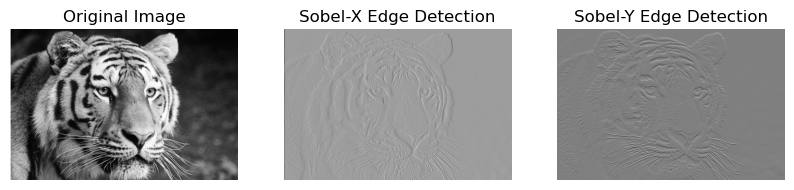

In [18]:
# 3 sol: Implement Edge Detection Using Convolution and  Implement Max Pooling and Average Pooling 

import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import Sequential

# Task 1: Edge Detection Using Sobel Filter
def sobel_edge_detection(image_path):
    # Load image in grayscale
    image = cv2.imread("/Users/nikhithrajukonduru/Desktop/grey.png", cv2.IMREAD_GRAYSCALE)
    
    # Check if image is loaded
    if image is None:
        print("Error: Image not found or could not be loaded.")
        return
    
    # Apply Sobel filter in x and y direction
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Display results
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title("Sobel-X Edge Detection")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title("Sobel-Y Edge Detection")
    plt.axis("off")
    
    plt.show()

# Task 2: Max Pooling and Average Pooling
# Create a random 4x4 matrix as an input image
input_matrix = np.random.rand(1, 4, 4, 1).astype(np.float32)

# Define Max Pooling and Average Pooling models outside the function
model_max = Sequential([MaxPooling2D(pool_size=(2, 2), strides=2, input_shape=(4, 4, 1))])
model_avg = Sequential([AveragePooling2D(pool_size=(2, 2), strides=2, input_shape=(4, 4, 1))])

# Perform pooling once to avoid retracing
max_pooled = model_max.predict(input_matrix)
avg_pooled = model_avg.predict(input_matrix)

# Print results
print("Original Matrix:\n", input_matrix.squeeze())
print("\nMax Pooled Matrix:\n", max_pooled.squeeze())
print("\nAverage Pooled Matrix:\n", avg_pooled.squeeze())

# Example usage
sobel_edge_detection("/Users/nikhithrajukonduru/Desktop/grey.jpg")  # Ensure this path is correct


In [20]:
#4 sol: Implementing and Comparing CNN Architectures 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Add

# Task 1: Implementing AlexNet
alexnet_model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print("AlexNet Model Summary:")
alexnet_model.summary()

# Task 2: Implementing a Residual Block and ResNet-like Model
def residual_block(input_tensor, filters):
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = Add()([x, input_tensor])  # Skip connection
    return x

input_layer = Input(shape=(224, 224, 3))
x = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(input_layer)
x = residual_block(x, 64)
x = residual_block(x, 64)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

resnet_model = Model(inputs=input_layer, outputs=output_layer)

print("\nResNet-like Model Summary:")
resnet_model.summary()


AlexNet Model Summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)


ResNet-like Model Summary:


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 112, 112,  │      9,472 │ input_layer_11[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 112, 112,  │     36,928 │ conv2d_9[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 112, 112,  │     36,928 │ conv2d_10[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 112, 112,  │          0 │ conv2d_11[0][0],  │
│                     │ 64)               │            │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 112, 112,  │     36,928 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 112, 112,  │     36,928 │ conv2d_12[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 112, 112,  │          0 │ conv2d_13[0][0],  │
│                     │ 64)               │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 802816)    │          0 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │ 102,760,5… │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10)        │      1,290 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,919,050 (392.61 MB)

 Trainable params: 102,919,050 (392.61 MB)

 Non-trainable params: 0 (0.00 B)